In [1]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import pickle
import pandas as pd
from sklearn.utils import resample
from Functions import *


pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\heeeb\anacon

In [2]:
df = pd.read_csv('data/TweetsOriginal.csv', encoding = 'ISO-8859-1')
x_train, x_test, y_train, y_test = clean_split(df)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Original Value Counts
1.0    2978
0.0     570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Final Resampled Value Counts
1.0    600
0.0    570
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(994, 652) (176, 652)
(994,) (176,)


### Test 1

In [3]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(random_state = 10), 
          'Gaussian': GaussianNB(), 'Multinomail': MultinomialNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults1.p')

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [02:33<00:00, 11.78s/it]


'Done'

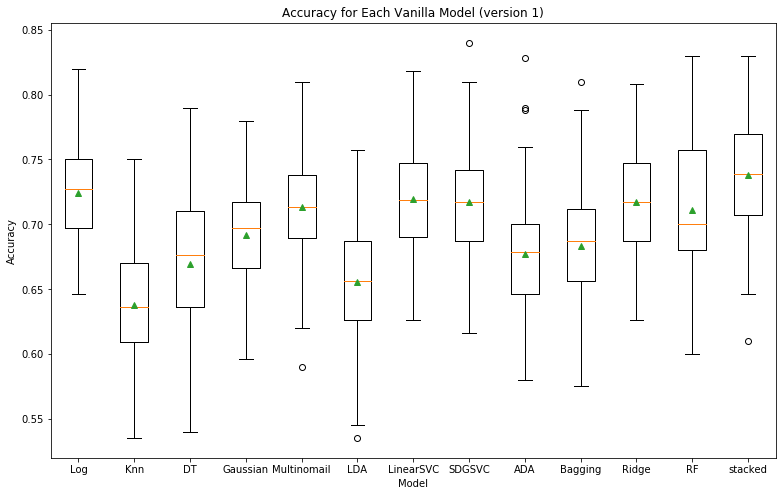

In [4]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults1', figure_title = 'Accuracy for Each Vanilla Model (version 1)', 
                   figsize = (13, 8))


### Test 2

In [5]:
models = {'Log': LogisticRegression(), 'Gaussian': GaussianNB(), 'Multinomail': MultinomialNB(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults2.p')

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:42<00:00, 10.21s/it]


'Done'

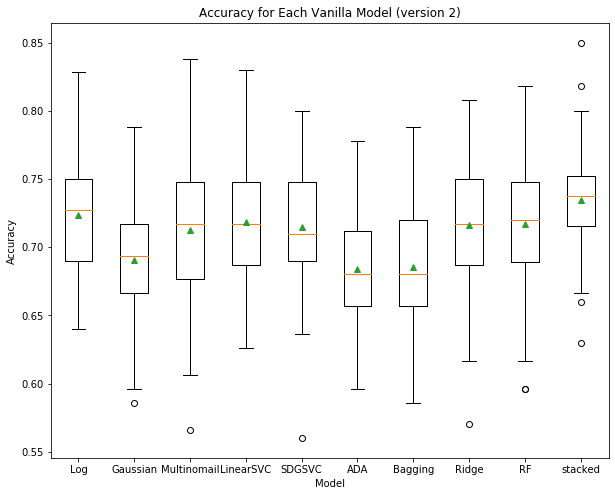

In [6]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults2', figure_title = 'Accuracy for Each Vanilla Model (version 2)', 
                   figsize = (10, 8))

## Test 3

In [7]:
models = {'Log': LogisticRegression(), 'Multinomail': MultinomialNB(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/VanillaResults3.p')

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:38<00:00,  5.54s/it]


'Done'

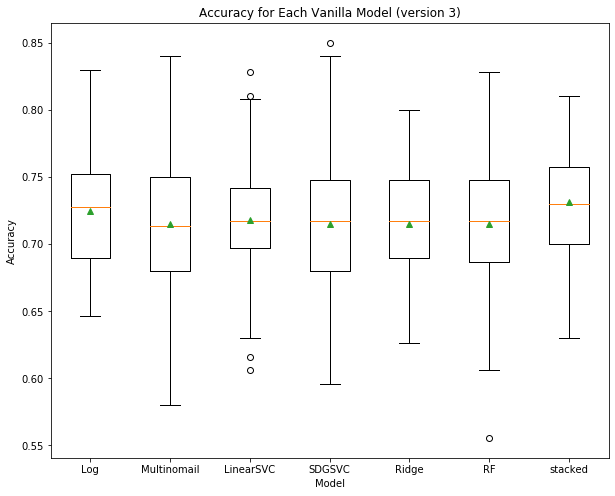

In [8]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults3', figure_title = 'Accuracy for Each Vanilla Model (version 3)', 
                   figsize = (10, 8))

In [ ]:
assert False

### Logistic Regression

In [7]:
vanilla_log = LogisticRegression()
vanilla_log.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_log.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_log.score(x_test, y_test)}')

Vanilla Train: 0.9235412474849095
Vanilla Test: 0.8011363636363636


In [8]:

param_grid = { 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1],
    'intercept_scaling': [.5, 1, 1.5],
    'class_weight': ['balanced', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000],
    'l1_ratio': [None, .5],
}

log_cv = run_gridsearch(LogisticRegression(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(log_cv, open('../Pickles/Grid_Logistic.p', 'wb'))

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 4672 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 5280 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 5904 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6758 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 10204 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12459 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 13778 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 18839 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 20454 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 23232 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 26728 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 28724 ta

       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.98
---
Test Score: 0.82
Best Parameters:
{'C': 0.5, 'class_weight': None, 'dual': False, 'intercept_scaling': 1, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'none', 'solver': 'sag', 'tol': 0.0001}



c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [33]:

param_grid = { 
    'penalty': ['l1', 'l2'],
    'dual': [False],
    'tol': [1e-4],
    'C': [.1, .25, .5],
    'intercept_scaling': [1],
    'class_weight': [None],
    'solver': ['sag'],
    'max_iter': [1000, 5000],
    'l1_ratio': [.25, .5, 1],
}

log_cv = run_gridsearch(LogisticRegression(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(log_cv, open('../Pickles/Grid_Logistic2.p', 'wb'))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.6s finished
c:\users\heeeb\anaconda3\envs\codeacademy\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.90
---
Test Score: 0.78
Best Parameters:
{'C': 0.5, 'class_weight': None, 'dual': False, 'intercept_scaling': 1, 'l1_ratio': 0.25, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}



## MultinomialNB

In [26]:
vanilla_multinb = MultinomialNB()
vanilla_multinb.fit(x_train, y_train) 

print(f'Vanilla Train: {vanilla_multinb.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_multinb.score(x_test, y_test)}')

Vanilla Train: 0.8531187122736419
Vanilla Test: 0.7670454545454546


In [27]:
param_grid ={
    'alpha': [.1, .25, .5, 1, 1.5, 2], 
    'fit_prior': [True, False]
}
multinb_cv = run_gridsearch(MultinomialNB(), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1, verbose = 2)
pickle.dump(multinb_cv, open('../Pickles/Grid_MultiNB.p', 'wb'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.86
---
Test Score: 0.77
Best Parameters:
{'alpha': 0.5, 'fit_prior': True}



[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


### SGDSVC

In [3]:
vanilla_sgd = SGDClassifier(random_state = 10)
vanilla_sgd.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_sgd.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_sgd.score(x_test, y_test)}')

Vanilla Train: 0.9808853118712274
Vanilla Test: 0.8068181818181818


In [5]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge', 'log', 'modified_huber', 'perceptron'],
    'alpha': [.001, .0001, .00001],
    'l1_ratio': [.01, .15, .5], 
    'max_iter': [1000, 2000], 
    'tol': [1e-2, 1e-3, 1e-4],
    'shuffle': [True, False],
    'epsilon': [.05, .1, .5],
#     'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'], 
    'power_t': [.1, .5, 1], 
    'n_iter_no_change': [5,10],
    'average': [True, False]
    
}
sgd_cv = run_gridsearch(SGDClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(sgd_cv, open('../Pickles/Grid_SVC.p', 'wb'))

Fitting 5 folds for each of 38880 candidates, totalling 194400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2290 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4641 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 5604 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 7306 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 8584 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 10378 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 12082 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 13721 tasks     

       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.93
---
Test Score: 0.81
Best Parameters:
{'alpha': 0.0001, 'average': True, 'epsilon': 0.05, 'l1_ratio': 0.01, 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.1, 'shuffle': False, 'tol': 0.01}



In [36]:
param_grid = {
    'penalty': ['l1'], 
    'loss': ['log'],
    'alpha': [.001, .0001, .00001],
    'l1_ratio': [.001, .01], 
    'max_iter': [1000], 
    'tol': [.1, .01, .001],
    'shuffle': [False],
    'epsilon': [.01, .05],
    'power_t': [.01, .1], 
    'n_iter_no_change': [2, 5],
    'average': [True]
    
}
sgd_cv = run_gridsearch(SGDClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(sgd_cv, open('../Pickles/Grid_SVC2.p', 'wb'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:    5.2s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.92
---
Test Score: 0.81
Best Parameters:
{'alpha': 0.0001, 'average': True, 'epsilon': 0.01, 'l1_ratio': 0.001, 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.01, 'shuffle': False, 'tol': 0.1}



[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    6.3s finished


In [37]:
param_grid = {
    'penalty': ['l1'], 
    'loss': ['log'],
    'alpha': [.0001],
    'l1_ratio': [.001, .0001, .00001], 
    'max_iter': [1000], 
    'tol': [.1, .5],
    'shuffle': [False],
    'epsilon': [.01, .001, .0001],
    'power_t': [.01, .001], 
    'n_iter_no_change': [5],
    'average': [True]
    
}
sgd_cv = run_gridsearch(SGDClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(sgd_cv, open('../Pickles/Grid_SVC3.p', 'wb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.92
---
Test Score: 0.81
Best Parameters:
{'alpha': 0.0001, 'average': True, 'epsilon': 0.01, 'l1_ratio': 0.001, 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.01, 'shuffle': False, 'tol': 0.1}



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.0s finished


### LinearSVC

In [6]:
vanilla_svc = LinearSVC(random_state = 10)
vanilla_svc.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_svc.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_svc.score(x_test, y_test)}')

Vanilla Train: 0.9818913480885312
Vanilla Test: 0.8068181818181818


In [7]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'C': [.5, 1.0, 1.5],
    'intercept_scaling': [.5, 1, 1.5],
    'max_iter': [1000, 2000]
}

svc_cv = run_gridsearch(LinearSVC(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(svc_cv, open('../Pickles/Grid_SVC.p', 'wb'))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.3s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.97
---
Test Score: 0.81
Best Parameters:
{'C': 0.5, 'dual': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}



[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    5.2s finished


In [23]:
param_grid = {
    'tol': [1e-1, 1e-2, 1e-3],
    'C': [.5, 1.0, 1.5],
    'intercept_scaling': [.1, .25, .5,],
}

svc_cv = run_gridsearch(LinearSVC(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(svc_cv, open('../Pickles/Grid_SVC2.p', 'wb'))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.97
---
Test Score: 0.82
Best Parameters:
{'C': 0.5, 'intercept_scaling': 0.25, 'tol': 0.1}



[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.4s finished


In [25]:
param_grid = {
    'tol': [.1, .2, .5],
    'C': [.5, 1, 1.5],
    'intercept_scaling': [.1, .25, .5,],
}

svc_cv = run_gridsearch(LinearSVC(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(svc_cv, open('../Pickles/Grid_SVC3.p', 'wb'))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.97
---
Test Score: 0.81
Best Parameters:
{'C': 0.5, 'intercept_scaling': 0.5, 'tol': 0.5}



[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.4s finished


### Ridge Classifier

In [8]:
vanilla_ridge = RidgeClassifier(random_state = 10)
vanilla_ridge.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_ridge.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_ridge.score(x_test, y_test)}')

Vanilla Train: 0.9668008048289738
Vanilla Test: 0.8011363636363636


In [9]:
param_grid = {
    'alpha': [.5, 1.0, 1.5], 
    'normalize': [True, False], 
    'tol': [1e-2, 1e-3, 1e-4], 
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
    
}
ridge_cv = run_gridsearch(RidgeClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(ridge_cv, open('../Pickles/Grid_Ridge.p', 'wb'))

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 475 tasks      | elapsed:   12.0s


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.92
---
Test Score: 0.80
Best Parameters:
{'alpha': 1.5, 'normalize': True, 'solver': 'lsqr', 'tol': 0.01}



[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:   16.2s finished


### Random Forest

In [10]:
vanilla_rf = RandomForestClassifier(random_state = 10)
vanilla_rf.fit(x_train, y_train)

print(f'Vanilla Train: {vanilla_rf.score(x_train, y_train)}')
print(f'Vanilla Test: {vanilla_rf.score(x_test, y_test)}')

Vanilla Train: 0.9949698189134809
Vanilla Test: 0.8181818181818182


In [13]:
param_grid = {
    'n_estimators': [50, 100, 150], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 100, 200, 500],
    'min_samples_split': [2, 3, 5], 
    'min_samples_leaf': [1,2,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 100, 200],
    'bootstrap': [True, False], 
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'ccp_alpha': [0.0, .5, 1.0]

    
    
}
rf_cv = run_gridsearch(RandomForestClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(rf_cv, open('../Pickles/Grid_RF.p', 'wb'))

Fitting 5 folds for each of 34992 candidates, totalling 174960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4869 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 6813 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7906 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 9081 tasks      | 

       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.99
---
Test Score: 0.81
Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}



In [39]:
param_grid = {
    'n_estimators': [150, 200, 500], 
    'criterion': ['gini'],
    'max_depth': [25, 50, 75,],
    'min_samples_split': [5, 7, 10], 
    'min_samples_leaf': [1],
    'max_features': ['log2'],
    'max_leaf_nodes': [None, 50],
    'bootstrap': [True], 
    'class_weight': ['balanced_subsample'],
    'ccp_alpha': [0.0]

    
    
}
rf_cv = run_gridsearch(RandomForestClassifier(random_state = 10), x_train, y_train, x_test, y_test, param_grid, n_jobs = -1,
                        verbose = 2)
pickle.dump(rf_cv, open('../Pickles/Grid_RF2.p', 'wb'))

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   28.6s finished


       Results
~~~~~~~~~~~~~~~~~~~~~
Train Score: 0.97
---
Test Score: 0.78
Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}



In [ ]:
assert False

In [10]:
models = {'Log': LogisticRegression(C= 0.5, class_weight= None, 
                                    dual= False, intercept_scaling= 1, max_iter= 1000, 
                                    penalty= 'l2', solver= 'sag', tol= 0.0001), 
          'Multinomail': MultinomialNB(alpha = .5),
          'LinearSVC': LinearSVC(C = .5, intercept_scaling = .5, tol = .5, random_state = 10), 
          'SDGSVC': SGDClassifier(random_state = 10, alpha= 0.0001, average= True, 
                                  epsilon= 0.01, l1_ratio= 0.001, loss= 'log', 
                                  max_iter= 1000, n_iter_no_change= 5, 
                                  penalty= 'l1', power_t= 0.01, shuffle= False, tol= 0.1),  
          'Ridge': RidgeClassifier(random_state = 10, alpha= 1.5, normalize= True, solver= 'lsqr', tol= 0.01), 
          'RF': RandomForestClassifier(random_state = 10, bootstrap= True, ccp_alpha= 0.0, 
                                       class_weight= 'balanced_subsample', criterion= 'gini', 
                                       max_depth= 50, max_features= 'log2', max_leaf_nodes= None, 
                                       min_samples_leaf= 1, min_samples_split= 5, n_estimators= 150)}

#create stacked model
new_models = stacked_model(models)

# getting results and model
result_dict = test_models(x_train, y_train, new_models, n_jobs = -1)

save_cv_results(result_dict, 'models/FinalTunedResults.p')

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:43<00:00,  6.19s/it]


'Done'

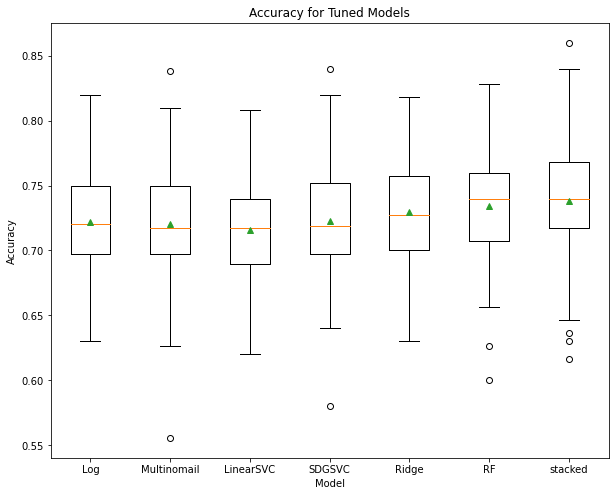

In [11]:
results = [i[1] for i in result_dict.items()]
model_names = [i for i in result_dict.keys()]
plot_model_results(results, model_names, 'figures/VanillaResults3', figure_title = 'Accuracy for Tuned Models', 
                   figsize = (10, 8))

### Final Stacked Model

Tuned Stacked Train: 0.9527162977867203
Tuned Stacked Test: 0.8125
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


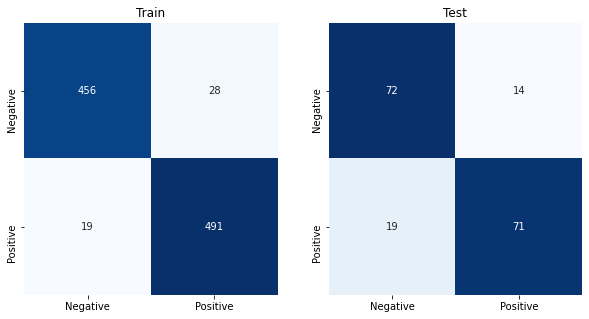

In [13]:
final_stacked = new_models['stacked']
final_stacked.fit(x_train, y_train)
print(f'Tuned Stacked Train: {final_stacked.score(x_train, y_train)}')
print(f'Tuned Stacked Test: {final_stacked.score(x_test, y_test)}')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

fig, ax = plt.subplots(1,2, figsize = (10,5))

cm_train = confusion_matrix(y_train, final_stacked.predict(x_train))
cm_test = confusion_matrix(y_test, final_stacked.predict(x_test))

sns.heatmap(cm_train, annot = True, ax = ax[0], xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive'], cmap = 'Blues', cbar = False, fmt = 'g')
sns.heatmap(cm_test, annot = True, ax = ax[1], xticklabels = ['Negative', 'Positive'], 
            yticklabels = ['Negative', 'Positive'], cmap = 'Blues', cbar = False, fmt = 'g')


ax[0].set_title('Train')
ax[1].set_title('Test')

plt.savefig('figures/StackedTunedCM.png')
plt.show()

pickle.dump(final_stacked, open('../Pickles/TunedStackedModel.p', 'wb'))

In [14]:
from sklearn.feature_selection import SelectFromModel
columns = pd.read_csv('data/TrainDF.csv').columns.tolist()
est_dict = final_stacked.named_estimators
word_import = {}
for i in final_stacked.named_estimators_: 
    mod = est_dict[i]
    smf = SelectFromModel(mod, threshold = - np.inf, max_features = 10)
    smf.fit(x_train, y_train)
    feature_idx = smf.get_support()
    feature_names = [columns[idx] for (idx, i) in enumerate(feature_idx) if i == True]
    word_import[i] = feature_names

print(word_import)

{'Log': ['fail', 'free', 'hate', 'headach', 'long', 'seem', 'suck', 'walk', 'whi', 'win'], 'Multinomail': ['almost', 'among', 'annoy', 'anyth', 'autocorrect', 'bad', 'banal', 'barri', 'batteri', 'bloodi'], 'LinearSVC': ['around', 'camera', 'crash', 'fail', 'hate', 'headach', 'result', 'smart', 'spend', 'walk'], 'SDGSVC': ['bad', 'camera', 'demo', 'enough', 'fail', 'fun', 'hate', 'headach', 'smart', 'win'], 'Ridge': ['camera', 'cooler', 'fuck', 'glad', 'juic', 'notic', 'prefer', 'seem', 'spend', 'visual'], 'RF': ['appl', 'fail', 'headach', 'ipad', 'iphon', 'link', 'need', 'store', 'whi', 'win']}


In [72]:
from lime import lime_text
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
%matplotlib inline

vect = pickle.load(open('../Pickles/vectorizer.p', 'rb'))
c = make_pipeline(vect, final_stacked)

df =pd.read_csv('data/TestDF.csv')
columns = df.columns.tolist()
feat = [i for i in columns if i not in ['target', 'Item']]


explainer = lime.lime_tabular.LimeTabularExplainer(df[[i for i in columns if i not in ['target', 'Item']]].values,
                                                   mode = 'classification', 
                                                  training_labels = df.target, 
                                                   feature_names = feat)

i = 10
labels = ['Negative', 'Positive']
row = df.loc[i, feat].values
exp = explainer.explain_instance(row, final_stacked.predict_proba, num_features = 9) 
sent = ' '.join([feat[idx] for (idx, i) in enumerate(row) if i ==1])
pred = final_stacked.predict(row.reshape(1,-1))[0]
print(f'Original Tokenized/Stemmed Tweet:\n\t\t"{sent}"')
print(f'Actual Label:\n\t\t{labels[int(pred)]}')
exp.show_in_notebook(show_table = False)
plt.show()

Original Tokenized/Stemmed Tweet:
		"amp app iphon quit readi sxsw wish"
Actual Label:
		Positive


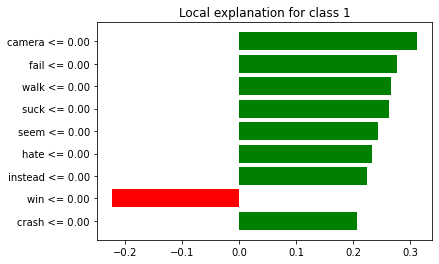

In [71]:
fig = exp.as_pyplot_figure()

KeyError: 1

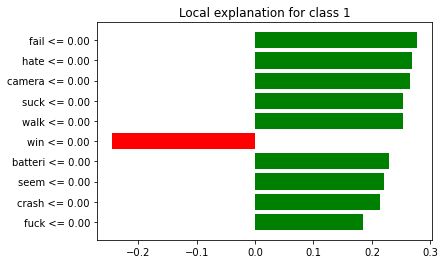

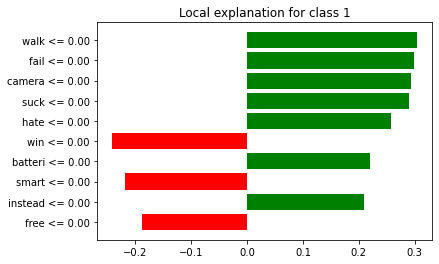

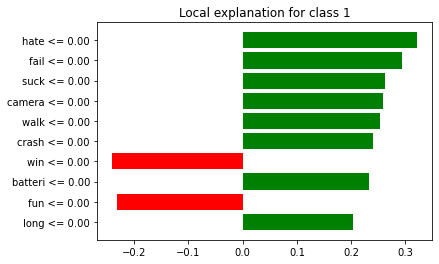

In [77]:
from lime import submodular_pick

sp_obj = submodular_pick.SubmodularPick(explainer, df[[i for i in columns if i not in ['target', 'Item']]].values, 
                                       final_stacked.predict_proba, num_features = 10, 
                                       num_exps_desired = 10)
[exp.as_pyplot_figure(label = 1) for exp in sp_obj.sp_explanations]